In [7]:
#Exploratory data analysis for Cohorts of college graduates vs. parents
#Start examiniing and cleaning data; import necessary packages
import pandas as pd
import numpy as np
import os


In [8]:
#Find path
pwd

NameError: name 'pwd' is not defined

In [9]:
#Import csv file into python and look at first five row of data
path=('/Users/lindalambert/Desktop/mrc_table8.csv')
df = pd.read_csv(path)
df.head()

,cohort,par_ventile,tier,tier_name,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
0,1980,1,1,Ivy Plus,6200.0,106300.0,0.700131,0.096970,0.333333,0.442424,...,0.066667,0.078788,0.157576,0.151515,0.581818,68100.0,83800.0,165.0,17653.0,0.009347
1,1980,1,2,Other elite schools (public and private),6500.0,71800.0,0.670964,0.050000,0.216667,0.324242,...,0.092424,0.107576,0.133333,0.124242,0.493939,56600.0,64600.0,660.0,60703.0,0.010873
2,1980,1,3,Highly selective public,7000.0,63600.0,0.649980,0.032670,0.158381,0.267756,...,0.132812,0.118608,0.117898,0.111506,0.485795,49300.0,55900.0,1408.0,126735.0,0.011110
3,1980,1,4,Highly selective private,6800.0,60300.0,0.625801,0.028302,0.117925,0.233491,...,0.132075,0.120283,0.141509,0.136792,0.478774,48300.0,53700.0,424.0,42920.0,0.009879
4,1980,1,5,Selective public,7200.0,41300.0,0.555779,0.007898,0.052871,0.113826,...,0.208976,0.173295,0.135291,0.124884,0.436629,35100.0,39700.0,10762.0,616241.0,0.017464


In [10]:
#Describe data
df.describe()

,cohort,par_ventile,tier,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,k_q5,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
count,3528.000000,3528.000000,3528.0000,3.519000e+03,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,...,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3513.000000,3519.000000,3.519000e+03,3519.000000
mean,1985.500000,14.714286,7.5000,1.608400e+05,35826.939471,0.561091,0.025247,0.090039,0.156838,0.275540,...,0.190648,0.181639,0.144829,0.129817,0.310508,28896.334186,33125.875320,13809.461211,2.871042e+05,0.049222
std,3.452542,19.671818,4.0317,3.567736e+05,21665.045781,0.100427,0.039453,0.089933,0.122388,0.155734,...,0.056014,0.062910,0.067521,0.062769,0.157847,14705.808070,14970.687931,22741.411443,4.081878e+05,0.040048
min,1980.000000,1.000000,1.0000,1.800000e+03,6200.000000,0.274227,0.000000,0.000000,0.000000,0.033048,...,0.042453,0.033113,0.057141,0.047778,0.006341,300.000000,10000.000000,51.000000,2.906000e+03,0.001247
25%,1982.750000,6.000000,4.0000,2.775000e+04,21500.000000,0.489743,0.003110,0.024399,0.059101,0.147728,...,0.142828,0.127749,0.101151,0.091192,0.181218,17600.000000,21800.000000,1385.000000,4.230900e+04,0.026854
50%,1985.500000,11.000000,7.5000,6.020000e+04,30000.000000,0.551845,0.008544,0.051899,0.111328,0.235370,...,0.200789,0.184057,0.131673,0.116656,0.304621,26000.000000,30200.000000,4304.000000,1.003500e+05,0.047306
75%,1988.250000,16.000000,11.0000,1.065000e+05,42700.000000,0.646868,0.028316,0.135475,0.244348,0.409168,...,0.238059,0.226090,0.165501,0.146459,0.432818,36600.000000,40700.000000,13570.500000,2.547710e+05,0.059455
max,1991.000000,99.000000,14.0000,3.414800e+06,207200.000000,0.789968,0.262852,0.489749,0.588781,0.692873,...,0.321168,0.381818,0.542687,0.533999,0.678007,102200.000000,113700.000000,132032.000000,1.527830e+06,0.416758


In [11]:
#List missing data for first five rows
missing_data = df.isnull()
missing_data.head(5)

,cohort,par_ventile,tier,tier_name,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# List data with missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

cohort
False    3528
Name: cohort, dtype: int64

par_ventile
False    3528
Name: par_ventile, dtype: int64

tier
False    3528
Name: tier, dtype: int64

tier_name
False    3528
Name: tier_name, dtype: int64

par_mean
False    3519
True        9
Name: par_mean, dtype: int64

k_mean
False    3519
True        9
Name: k_mean, dtype: int64

k_rank
False    3519
True        9
Name: k_rank, dtype: int64

k_top1pc
False    3519
True        9
Name: k_top1pc, dtype: int64

k_top5pc
False    3519
True        9
Name: k_top5pc, dtype: int64

k_top10pc
False    3519
True        9
Name: k_top10pc, dtype: int64

k_q5
False    3519
True        9
Name: k_q5, dtype: int64

k_q4
False    3519
True        9
Name: k_q4, dtype: int64

k_q3
False    3519
True        9
Name: k_q3, dtype: int64

k_q2
False    3519
True        9
Name: k_q2, dtype: int64

k_q1
False    3519
True        9
Name: k_q1, dtype: int64

k_nowork
False    3519
True        9
Name: k_nowork, dtype: int64

married
False    3519
True        

In [25]:
df.head()


,cohort,par_ventile,tier,tier_name,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
0,1980,1,1,Ivy Plus,6200.0,106300.0,0.700131,0.096970,0.333333,0.442424,...,0.066667,0.078788,0.157576,0.151515,0.581818,68100.0,83800.0,165.0,17653.0,0.009347
1,1980,1,2,Other elite schools (public and private),6500.0,71800.0,0.670964,0.050000,0.216667,0.324242,...,0.092424,0.107576,0.133333,0.124242,0.493939,56600.0,64600.0,660.0,60703.0,0.010873
2,1980,1,3,Highly selective public,7000.0,63600.0,0.649980,0.032670,0.158381,0.267756,...,0.132812,0.118608,0.117898,0.111506,0.485795,49300.0,55900.0,1408.0,126735.0,0.011110
3,1980,1,4,Highly selective private,6800.0,60300.0,0.625801,0.028302,0.117925,0.233491,...,0.132075,0.120283,0.141509,0.136792,0.478774,48300.0,53700.0,424.0,42920.0,0.009879
4,1980,1,5,Selective public,7200.0,41300.0,0.555779,0.007898,0.052871,0.113826,...,0.208976,0.173295,0.135291,0.124884,0.436629,35100.0,39700.0,10762.0,616241.0,0.017464


In [18]:
#Compute average for all data types with empty sets and replace with means.

In [19]:

avg_par_mean=df['par_mean'].astype('float').mean(axis=0)
print("Average of par_mean:", avg_par_mean)

Average of par_mean: 160839.98294970163


In [20]:

df["par_mean"].replace(np.nan, avg_par_mean, inplace=True)

In [21]:
avg_k_mean=df['k_mean'].astype('float').mean(axis=0)
print("Average of k_mean:", avg_k_mean)

Average of k_mean: 35826.93947144075


In [22]:
df["k_mean"].replace(np.nan, avg_k_mean, inplace=True)

In [23]:
avg_k_rank=df['k_rank'].astype('float').mean(axis=0)
print("Average of k_rank:", avg_k_rank)

Average of k_rank: 0.5610906889462964


In [26]:
df["k_rank"].replace(np.nan, avg_k_rank, inplace=True)

In [27]:
avg_k_top1pc=df['k_top1pc'].astype('float').mean(axis=0)
print("Average of k_top1pc:", avg_k_top1pc)

Average of k_top1pc: 0.025246771475401355


In [29]:
df["k_top1pc"].replace(np.nan, avg_k_top1pc, inplace=True)


In [30]:
avg_k_top5pc=df['k_top5pc'].astype('float').mean(axis=0)
print("Average of k_top5pc:", avg_k_top5pc)

Average of k_top5pc: 0.0900388668590162


In [31]:
df["k_top5pc"].replace(np.nan, avg_k_top5pc,inplace=True)

In [32]:
avg_k_top10pc=df['k_top10pc'].astype('float').mean(axis=0)
print("Average of k_top10pc:", avg_k_top10pc)

Average of k_top10pc: 0.15683778037269636


In [33]:
df["k_top10pc"].replace(np.nan, avg_k_top10pc, inplace=True)

In [34]:
avg_k_q5=df['k_q5'].astype('float').mean(axis=0)
print("Average of k_q5:", avg_k_q5)

Average of k_q5: 0.2755398171119407


In [40]:
df["k_q5"].replace(np.nan, avg_k_q5, inplace=True)


In [41]:
avg_k_q4=df['k_q4'].astype('float').mean(axis=0)
print("Average of k_q4:", avg_k_q4)

Average of k_q4: 0.20734367447812804


In [42]:
df["k_q4"].replace(np.nan, avg_k_q4, inplace=True)


In [43]:
avg_k_q3=df['k_q3'].astype('float').mean(axis=0)
print("Average of k_q3:", avg_k_q3)

Average of k_q3: 0.19064848598949366


In [44]:
df["k_q3"].replace(np.nan, avg_k_q3, inplace=True)

In [45]:
avg_k_q2=df['k_q2'].astype('float').mean(axis=0)
print("Average of k_q2:", avg_k_q2)

Average of k_q2: 0.18163915940821337


In [47]:
df["k_q2"].replace(np.nan, avg_k_q2, inplace=True)


In [48]:
avg_k_q1=df['k_q1'].astype('float').mean(axis=0)
print("Average of k_q1:", avg_k_q1)

Average of k_q1: 0.14482886338601908


In [49]:
df["k_q1"].replace(np.nan, avg_k_q1,inplace=True)

In [50]:
avg_k_nowork=df['k_nowork'].astype('float').mean(axis=0)
print("Average of k_nowork:", avg_k_nowork)

Average of k_nowork: 0.12981666184316756


In [51]:
df["k_nowork"].replace(np.nan, avg_k_nowork, inplace=True)

In [52]:
avg_married=df['married'].astype('float').mean(axis=0)
print("Average of married:", avg_married)

Average of married: 0.31050774768899875


In [53]:
df["married"].replace(np.nan, avg_married, inplace=True)

In [54]:
avg_k_median=df['k_median'].astype('float').mean(axis=0)
print("Average of k_median:", avg_k_median)

Average of k_median: 28896.334185848253


In [56]:
df["k_median"].replace(np.nan, avg_k_median, inplace=True)


In [55]:
avg_k_median_nozero=df['k_median_nozero'].astype('float').mean(axis=0)
print("Average of k_median_nozero:", avg_k_median_nozero)

Average of k_median_nozero: 33125.87532023911


In [58]:
df["k_median_nozero"].replace(np.nan, avg_k_median_nozero, inplace=True)


In [56]:
avg_count=df['count'].astype('float').mean(axis=0)
print("Average of count:", avg_count)

Average of count: 13809.461210571186


In [57]:
df["count"].replace(np.nan, avg_count, inplace=True)

In [58]:
avg_tot_count=df['tot_count'].astype('float').mean(axis=0)
print("Average of tot_count:", avg_tot_count)

Average of tot_count: 287104.16084114806


In [59]:
df["tot_count"].replace(np.nan, avg_tot_count, inplace=True)

In [60]:
avg_density=df['density'].astype('float').mean(axis=0)
print("Average of density:", avg_density)

Average of density: 0.049222342183757574


In [61]:
df["density"].replace(np.nan, avg_density, inplace=True)


In [62]:
%%capture
! pip install seaborn

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [65]:
# list the data types for each column
print(df.dtypes)

cohort               int64
par_ventile          int64
tier                 int64
tier_name           object
par_mean           float64
k_mean             float64
k_rank             float64
k_top1pc           float64
k_top5pc           float64
k_top10pc          float64
k_q5               float64
k_q4               float64
k_q3               float64
k_q2               float64
k_q1               float64
k_nowork           float64
married            float64
k_median           float64
k_median_nozero    float64
count              float64
tot_count          float64
density            float64
dtype: object


In [68]:
df.corr()


,cohort,par_ventile,tier,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,k_q5,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
cohort,1.000000e+00,-3.322151e-18,0.000000e+00,0.033649,-0.492079,-0.075099,-0.030171,-0.057737,-0.070612,-0.089114,...,0.099685,0.212760,-0.052085,-0.045407,-0.861890,-0.538114,-0.591781,0.051117,0.059265,-0.002105
par_ventile,-3.322151e-18,1.000000e+00,-1.950802e-17,0.907955,0.160367,0.127967,0.216309,0.222762,0.216328,0.199527,...,-0.298901,-0.149302,0.049181,0.054249,0.096810,0.104366,0.156585,-0.096305,0.007439,0.007031
tier,0.000000e+00,-1.950802e-17,1.000000e+00,-0.042711,-0.641686,-0.849153,-0.668693,-0.789191,-0.824357,-0.838341,...,0.667888,0.723747,0.666850,0.639941,-0.056010,-0.684837,-0.633251,0.322240,0.381049,-0.037978
par_mean,3.364938e-02,9.079553e-01,-4.271087e-02,1.000000,0.173337,0.115122,0.292304,0.269733,0.246985,0.209170,...,-0.319378,-0.120360,0.085755,0.091320,0.027444,0.097478,0.156319,-0.095281,-0.013518,0.168235
k_mean,-4.920790e-01,1.603669e-01,-6.416860e-01,0.173337,1.000000,0.759124,0.769326,0.827082,0.824098,0.811117,...,-0.726404,-0.759897,-0.421510,-0.400298,0.537008,0.949039,0.963975,-0.250546,-0.283347,0.136615
k_rank,-7.509922e-02,1.279670e-01,-8.491533e-01,0.115122,0.759124,1.000000,0.674052,0.835877,0.901144,0.956792,...,-0.761551,-0.905908,-0.802212,-0.773214,0.240923,0.838886,0.774979,-0.361578,-0.405274,0.099929
k_top1pc,-3.017145e-02,2.163087e-01,-6.686926e-01,0.292304,0.769326,0.674052,1.000000,0.939406,0.874747,0.788958,...,-0.748069,-0.594082,-0.301699,-0.276163,0.007670,0.657985,0.680671,-0.224757,-0.260166,0.201477
k_top5pc,-5.773684e-02,2.227617e-01,-7.891910e-01,0.269733,0.827082,0.835877,0.939406,1.000000,0.983429,0.935683,...,-0.875848,-0.755437,-0.443561,-0.411935,0.080246,0.776075,0.781603,-0.259968,-0.303770,0.165523
k_top10pc,-7.061197e-02,2.163283e-01,-8.243571e-01,0.246985,0.824098,0.901144,0.874747,0.983429,1.000000,0.980300,...,-0.906031,-0.828668,-0.520487,-0.486716,0.126157,0.811763,0.804788,-0.271912,-0.315003,0.142041
k_q5,-8.911424e-02,1.995269e-01,-8.383414e-01,0.209170,0.811117,0.956792,0.788958,0.935683,0.980300,1.000000,...,-0.898382,-0.897618,-0.612777,-0.577920,0.192618,0.840763,0.816523,-0.285337,-0.325740,0.113421


In [66]:
import pandas as pd
import numpy as np

df[['par_ventile', 'tier', 'par_mean', 'k_mean', 'k_top1pc','k_top5pc','k_top10pc']].corr()


,par_ventile,tier,par_mean,k_mean,k_top1pc,k_top5pc,k_top10pc
par_ventile,1.000000e+00,-1.950802e-17,0.907955,0.160367,0.216309,0.222762,0.216328
tier,-1.950802e-17,1.000000e+00,-0.042711,-0.641686,-0.668693,-0.789191,-0.824357
par_mean,9.079553e-01,-4.271087e-02,1.000000,0.173337,0.292304,0.269733,0.246985
k_mean,1.603669e-01,-6.416860e-01,0.173337,1.000000,0.769326,0.827082,0.824098
k_top1pc,2.163087e-01,-6.686926e-01,0.292304,0.769326,1.000000,0.939406,0.874747
k_top5pc,2.227617e-01,-7.891910e-01,0.269733,0.827082,0.939406,1.000000,0.983429
k_top10pc,2.163283e-01,-8.243571e-01,0.246985,0.824098,0.874747,0.983429,1.000000


(0, 217309.810425994)

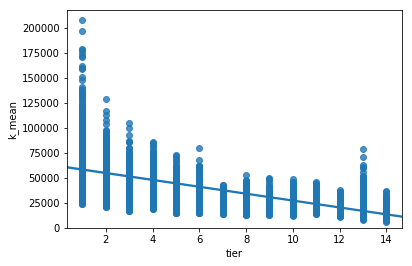

In [67]:
# Tier as potential predictor variable of kids mean income
sns.regplot(x="tier", y="k_mean", data=df)
plt.ylim(0,)

(0, 217309.810425994)

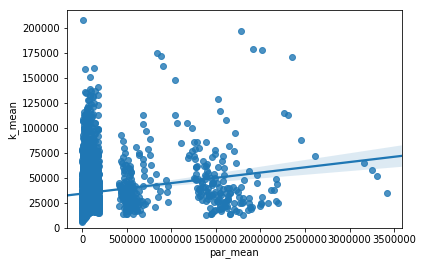

In [68]:
# Parents mean income as potential predictor variable of kids mean income
sns.regplot(x="par_mean", y="k_mean", data=df)
plt.ylim(0,)

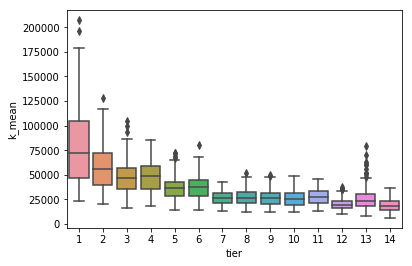

In [69]:
#Tier of college comparied to kids mean income
sns.boxplot(x="tier", y="k_mean", data=df)

In [70]:
from scipy import stats 

In [71]:
pearson_coef, p_value = stats.pearsonr(df['par_mean'], df['k_mean'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.17333673208034112  with a P-value of P = 3.373225035911398e-25


In [72]:
pearson_coef, p_value = stats.pearsonr(df['tier'], df['k_mean'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.641685967948407  with a P-value of P = 0.0


In [73]:
#Regression modeling
from sklearn.linear_model import LinearRegression

In [74]:
#Linear regression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
X = df[['tier']]
Y = df['k_mean']

In [76]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
Yhat=lm.predict(X)


In [78]:
lm.intercept_

61655.509561684215

In [79]:
lm.coef_

array([-3443.80934537])

In [80]:
#Tier_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.41176088146188433


In [81]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 


(0, 3585557.4041828746)

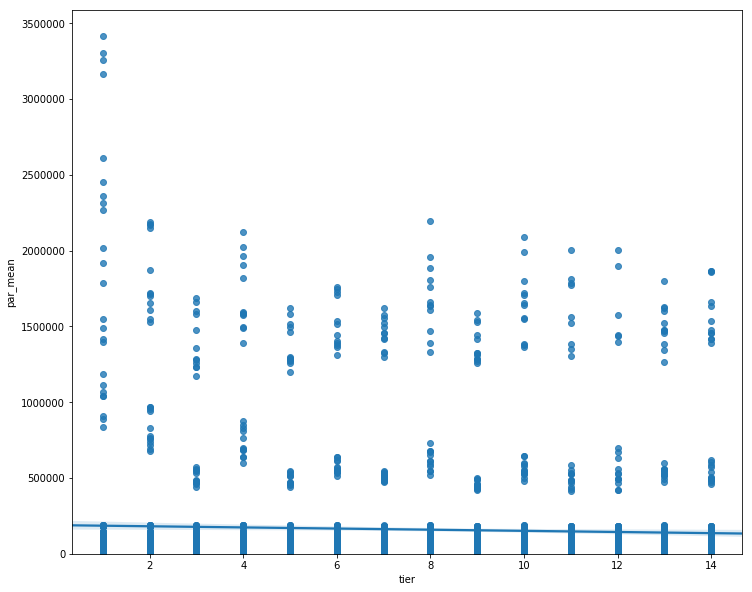

In [82]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="tier", y="par_mean", data=df)
plt.ylim(0,)

In [84]:
#Multiple regression
Z = df[['tier','par_mean']]

In [85]:
lm.fit(Z, df['k_mean'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
lm.intercept_

59976.27457478095

In [87]:
lm.coef_

array([-3.41029800e+03,  8.87776721e-03])

In [94]:
# Fit the model 
lm.fit(Z, df['k_mean'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['k_mean']))

The R-square is:  0.43309529720994056


In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
Y_predict_multifit = lm.predict(Z)


In [97]:
print('The mean square error of k_mean and predicted value using multifit is: ', \
      mean_squared_error(df['k_mean'], Y_predict_multifit))


The mean square error of k_mean and predicted value using multifit is:  265336221.6484108


In [98]:
df.loc[: , "cohort"]


0       1980
1       1980
2       1980
3       1980
4       1980
5       1980
6       1980
7       1980
8       1980
9       1980
10      1980
11      1980
12      1980
13      1980
14      1980
15      1980
16      1980
17      1980
18      1980
19      1980
20      1980
21      1980
22      1980
23      1980
24      1980
25      1980
26      1980
27      1980
28      1980
29      1980
        ... 
3498    1991
3499    1991
3500    1991
3501    1991
3502    1991
3503    1991
3504    1991
3505    1991
3506    1991
3507    1991
3508    1991
3509    1991
3510    1991
3511    1991
3512    1991
3513    1991
3514    1991
3515    1991
3516    1991
3517    1991
3518    1991
3519    1991
3520    1991
3521    1991
3522    1991
3523    1991
3524    1991
3525    1991
3526    1991
3527    1991
Name: cohort, Length: 3528, dtype: int64

(0, 217309.810425994)

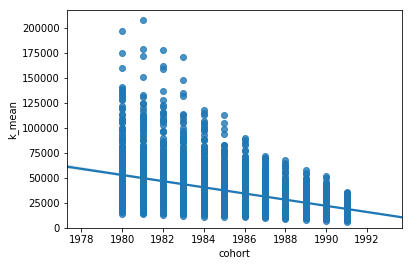

In [99]:
# Cohort as potential predictor variable of kids mean income
sns.regplot(x="cohort", y="k_mean", data=df)
plt.ylim(0,)

In [100]:
c = df[['cohort']]
d = df['k_mean']

In [101]:
lm.fit(c,d)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
Yhat=lm.predict(c)

In [103]:
lm.intercept_

6158916.283034951

In [104]:
lm.coef_

array([-3083.9029683])

In [105]:
#Cohort_fit
lm.fit(c, d)
# Find the R^2
print('The R-square is: ', lm.score(c, d))

The R-square is:  0.2421417743902581


In [106]:
pearson_coef, p_value = stats.pearsonr(df['cohort'], df['k_mean'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.49207903266676367  with a P-value of P = 1.4107096790998975e-214


In [107]:
#Multiple regression with three variables

B = df[['tier','cohort','par_mean']]

In [108]:
lm.fit(B, df['k_mean'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
lm.intercept_

6251109.931983381

In [110]:
lm.coef_

array([-3.40645321e+03, -3.11827062e+03,  9.89632311e-03])

In [111]:
# Fit the model 
lm.fit(B, df['k_mean'])
# Find the R^2
print('The R-square is: ', lm.score(B, df['k_mean']))

The R-square is:  0.6803832703791377


In [112]:
Y_predict_multifit = lm.predict(B)

In [113]:
print('The mean square error of k_mean and predicted value using multifit is: ', \
      mean_squared_error(df['k_mean'], Y_predict_multifit))

The mean square error of k_mean and predicted value using multifit is:  149594623.21593633


In [114]:
Y_predict_multifit = lm.predict(B)

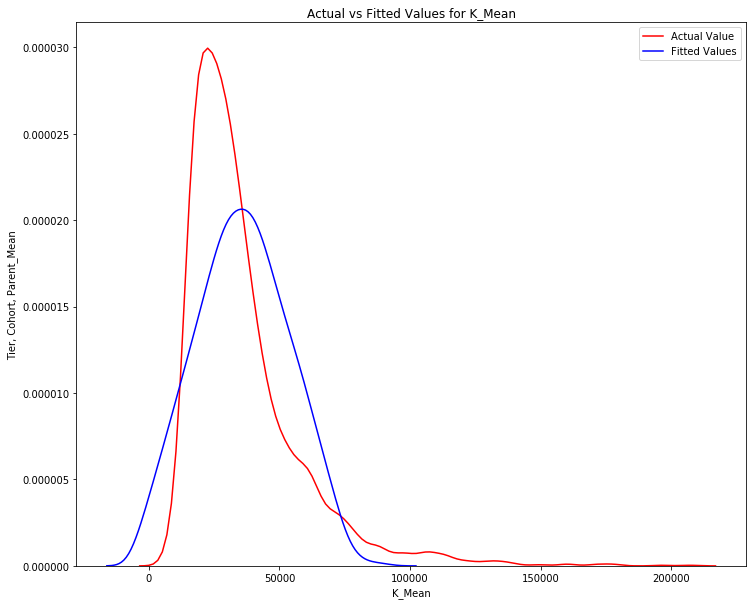

In [115]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['k_mean'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_predict_multifit, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for K_Mean')
plt.xlabel('K_Mean')
plt.ylabel('Tier, Cohort, Parent_Mean')

plt.show()
plt.close()

In [116]:
#Polynomial regression of college tier as a predictor of kids mean income.
x = df['tier']
y = df['k_mean']

f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

       2
434.9 x - 9968 x + 7.905e+04


In [117]:
np.polyfit(x, y, 2)

array([  434.93824578, -9967.88303211, 79053.03939301])

In [118]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(1, 16, 3528)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for K_mean ~ College Tier')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('k_mean')

    plt.show()
    plt.close()

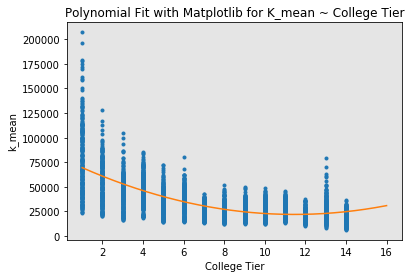

In [120]:
PlotPolly(p, x, y, 'College Tier')

In [121]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [125]:
Z_pr=pr.fit_transform(Z)

In [126]:
Z.shape

(3528, 2)

In [127]:
Z_pr.shape

(3528, 6)

In [128]:
from sklearn.metrics import r2_score


In [129]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.49582914000122913


In [130]:
mean_squared_error(df['k_mean'], p(x))

235974036.55133244

In [132]:

df[['tier','k_mean']].mean()


tier          7.500000
k_mean    35826.939471
dtype: float64

In [140]:
# grouping results
df_gptest = df[['tier','k_mean']]
grouped_test1 = df_gptest.groupby(['tier'],as_index=False).mean()
grouped_test1

,tier,k_mean
0,1,78268.650794
1,2,56443.253968
2,3,46333.730159
3,4,48023.809524
4,5,36154.365079
5,6,37196.031746
6,7,26794.444444
7,8,27076.587302
8,9,26425.000000
9,10,25978.571429
